In [4]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Load the dataset
df = pd.read_csv('data/USA_Housing.csv')

# Display the first 5 rows
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df = df.drop('Address', axis=1)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


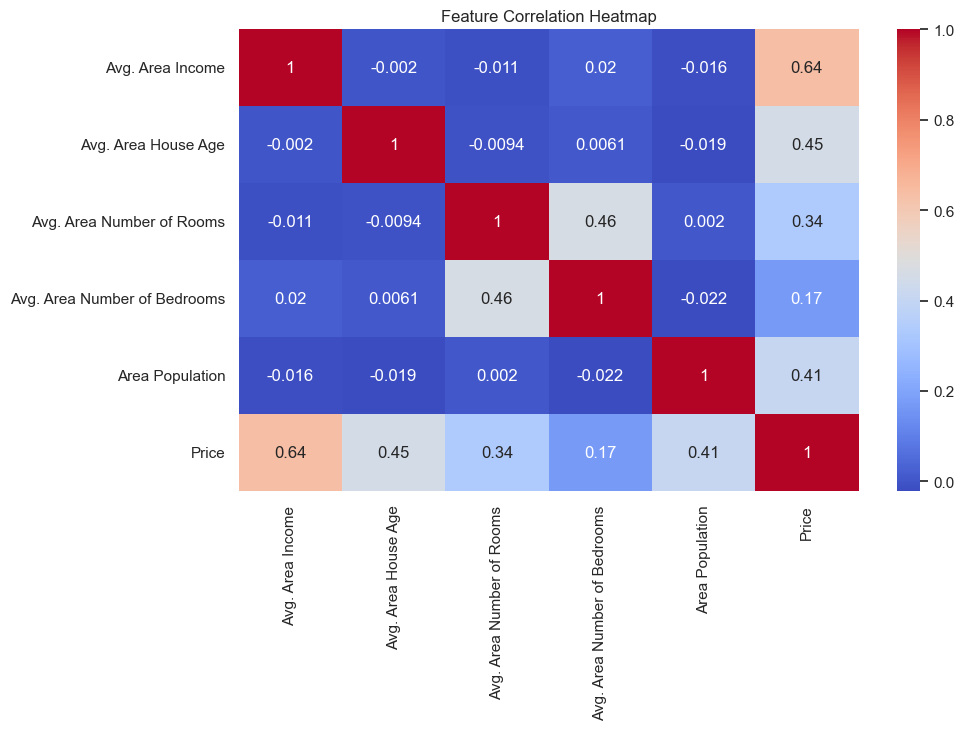

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



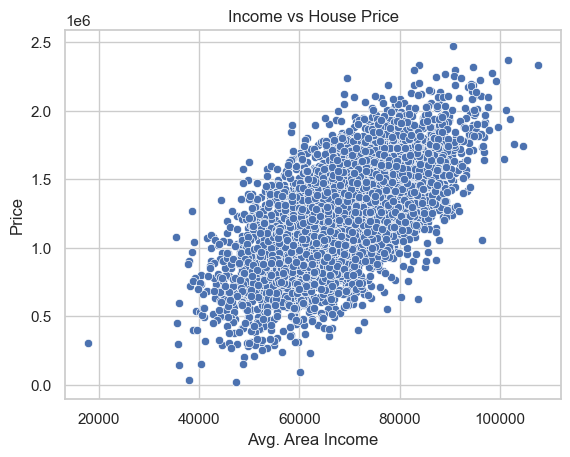

In [10]:
sns.scatterplot(data=df, x='Avg. Area Income', y='Price')
plt.title('Income vs House Price')
plt.show()


In [11]:
X = df.drop('Price', axis=1)
y = df['Price']



In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 80879.09723489822
R² Score: 0.9179971706834288


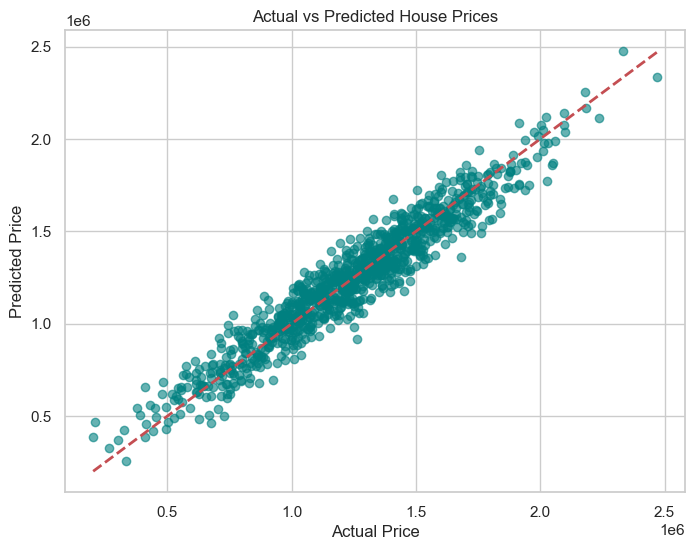

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [17]:
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [18]:
def predict_price(input_data):
    return model.predict([input_data])[0]


In [19]:
sample = X_test.iloc[0]
predicted = predict_price(sample)
print("Predicted Price:", predicted)


Predicted Price: 1308587.9269975894


In [20]:
import pickle

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [21]:
import pickle
import numpy as np

# Load the model
with open('house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Sample input (customize this with real input later)
# Example: [Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population]
sample_input = [65000, 5, 6, 3, 30000]

# Reshape input as 2D array
input_data = np.array(sample_input).reshape(1, -1)

# Predict
predicted_price = loaded_model.predict(input_data)

print(f"💰 Predicted House Price: ${predicted_price[0]:,.2f}")


💰 Predicted House Price: $778,827.49


In [22]:
pip install tk


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Karishma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [32]:
import pickle

# Replace `model` with your trained model variable name
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl


In [33]:
import csv
from datetime import datetime

def log_prediction(inputs, prediction):
    with open("prediction_log.csv", mode='a', newline='') as file:
        writer = csv.writer(file)
        now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        writer.writerow([now] + inputs + [prediction])


In [34]:
log_prediction(input_data, prediction)


NameError: name 'prediction' is not defined

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
